In [127]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from pandas import set_option
import random

data = pd.read_csv('Cleaned-Data 1 1-2.csv')

In [128]:
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [129]:
set(data['Severity_Severe'])

{0, 1}

In [130]:
#no duplicate
data.duplicated().sum()

0

In [131]:
# missing value
missing = data.isna().sum()
missing

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [132]:
#Creating an empty column for the target variable.
data['Severity'] = None

In [133]:
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Severity
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,0,0,1,China,None
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,0,1,0,China,None
2,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,1,0,0,China,None
3,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,0,1,China,None
4,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,1,0,China,None


In [134]:
set(data['Severity'])

{None}

In [135]:
# rearranging the value of the features

data.loc[data['Severity_None'] == 1, 'Severity'] = 'None'
data.loc[data['Severity_Mild'] == 1, 'Severity'] = 'Mild'
data.loc[data['Severity_Moderate'] == 1, 'Severity'] = 'Moderate'
data.loc[data['Severity_Severe'] == 1, 'Severity'] = 'Severe'

In [136]:
 # KNN Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import SCORERS
# sorted(sklearn.metrics.SCORERS.keys())

In [137]:
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Severity
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,0,0,1,China,Mild
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,0,1,0,China,Mild
2,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,1,0,0,China,Mild
3,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,0,1,China,Moderate
4,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,1,0,China,Moderate


In [138]:
data.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country', 'Severity'],
      dtype='object')

In [139]:
# dropping the following columns

columns = ['Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe',]
data.drop(columns, inplace = True, axis=1)

In [140]:
#Identifying the shape of the dataset
data.shape

(316800, 24)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [142]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Fever,316800.0,0.312500,0.463513,0.0,0.0,0.0,1.0,1.0
Tiredness,316800.0,0.500000,0.500001,0.0,0.0,0.5,1.0,1.0
Dry-Cough,316800.0,0.562500,0.496079,0.0,0.0,1.0,1.0,1.0
Difficulty-in-Breathing,316800.0,0.500000,0.500001,0.0,0.0,0.5,1.0,1.0
Sore-Throat,316800.0,0.312500,0.463513,0.0,0.0,0.0,1.0,1.0
None_Sympton,316800.0,0.062500,0.242062,0.0,0.0,0.0,0.0,1.0
Pains,316800.0,0.363636,0.481046,0.0,0.0,0.0,1.0,1.0
Nasal-Congestion,316800.0,0.545455,0.497930,0.0,0.0,1.0,1.0,1.0
Runny-Nose,316800.0,0.545455,0.497930,0.0,0.0,1.0,1.0,1.0
Diarrhea,316800.0,0.363636,0.481046,0.0,0.0,0.0,1.0,1.0


In [143]:
data.nunique()

Fever                       2
Tiredness                   2
Dry-Cough                   2
Difficulty-in-Breathing     2
Sore-Throat                 2
None_Sympton                2
Pains                       2
Nasal-Congestion            2
Runny-Nose                  2
Diarrhea                    2
None_Experiencing           2
Age_0-9                     2
Age_10-19                   2
Age_20-24                   2
Age_25-59                   2
Age_60+                     2
Gender_Female               2
Gender_Male                 2
Gender_Transgender          2
Contact_Dont-Know           2
Contact_No                  2
Contact_Yes                 2
Country                    10
Severity                    4
dtype: int64

In [144]:
#Encoding the 'Severity Column' using sklearn encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Severity'] = le.fit_transform(data['Severity']).astype('int64')
data['Country'] = le.fit_transform(data['Country']).astype('int64')

In [145]:
data.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes',
       'Country', 'Severity'],
      dtype='object')

In [146]:
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Severity
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,1,0,0
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,1,0,0,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,1,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,1


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Fever                    316800 non-null  int64
 1   Tiredness                316800 non-null  int64
 2   Dry-Cough                316800 non-null  int64
 3   Difficulty-in-Breathing  316800 non-null  int64
 4   Sore-Throat              316800 non-null  int64
 5   None_Sympton             316800 non-null  int64
 6   Pains                    316800 non-null  int64
 7   Nasal-Congestion         316800 non-null  int64
 8   Runny-Nose               316800 non-null  int64
 9   Diarrhea                 316800 non-null  int64
 10  None_Experiencing        316800 non-null  int64
 11  Age_0-9                  316800 non-null  int64
 12  Age_10-19                316800 non-null  int64
 13  Age_20-24                316800 non-null  int64
 14  Age_25-59                316800 non-

In [148]:
data.shape

(316800, 24)

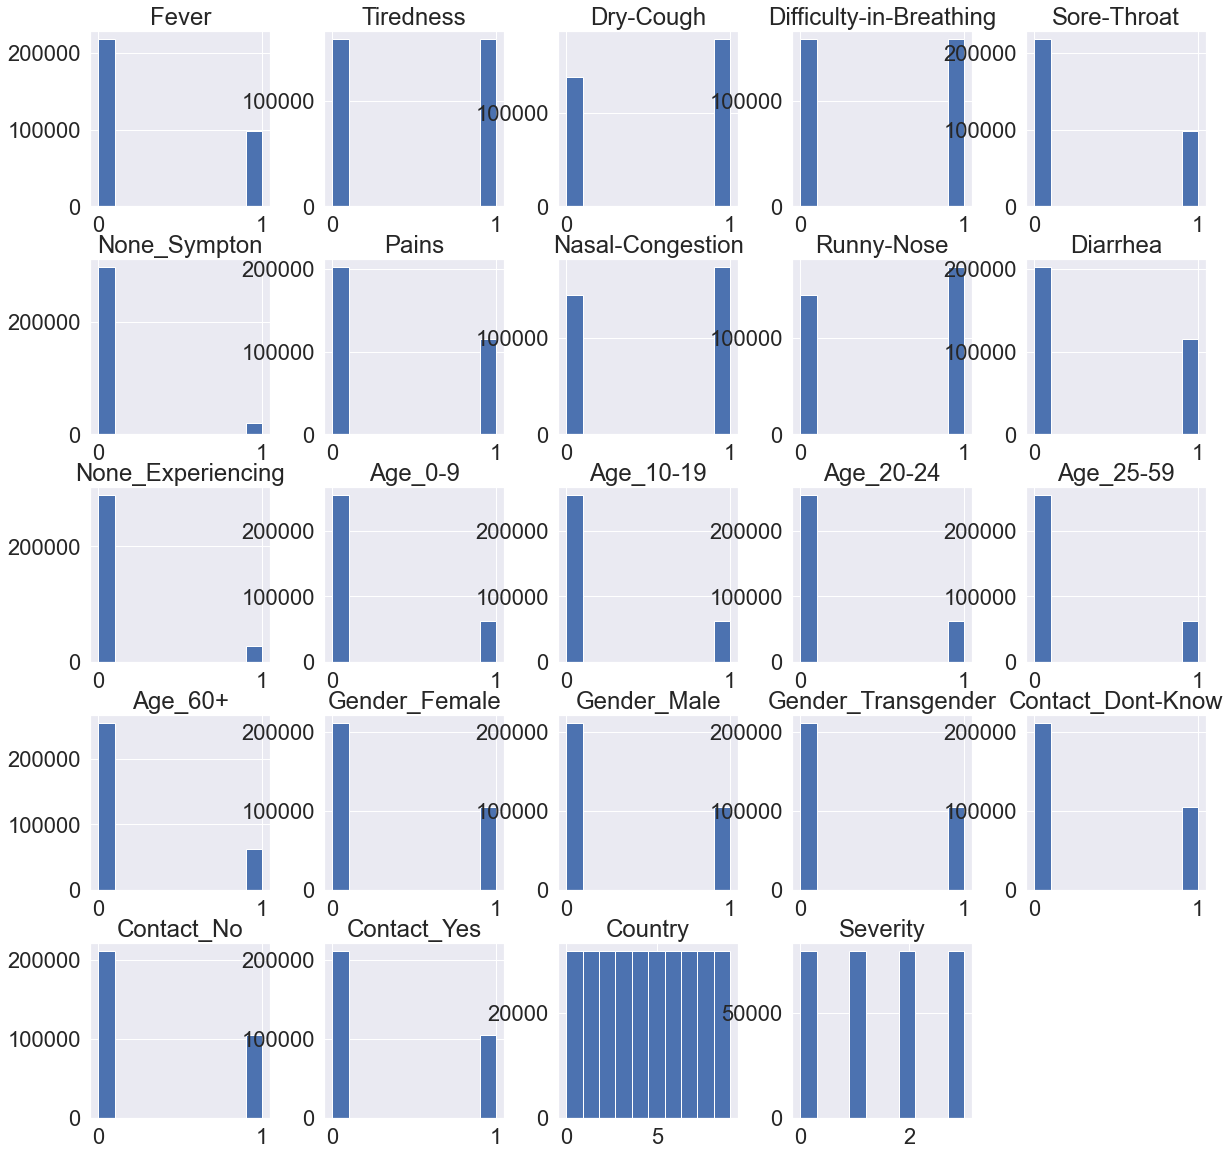

In [149]:
#Univarate Data Exploration Using Histogram
from matplotlib import pyplot
data.hist()
plt.gcf().set_size_inches(20,20)
pyplot.show()

C:\Users\Shehu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Severity
0    79200
1    79200
2    79200
3    79200
dtype: int64

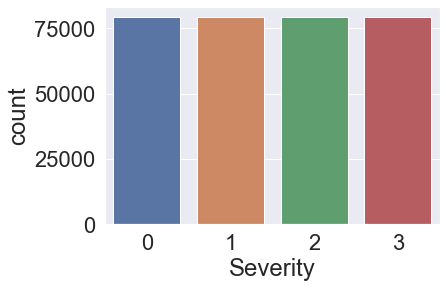

In [150]:
# checking for class imbalance

import seaborn as sns
sns.countplot(data['Severity'])

target_c = data.groupby('Severity').size()
target_c

In [151]:
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Severity
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,1,0,0
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,1,0,0,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,1,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,1


In [152]:
set(data['Severity'])

{0, 1, 2, 3}

In [156]:
data_four = data

In [157]:
data_two = data

In [158]:
data_three = data

In [ ]:
# first method

In [176]:
data_four.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Severity,Severity_Outcome
0,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,1,0,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,1,0,0,0,1
2,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,1,0,0,0,0,1
3,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,1,0,1,0
4,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,1,0,0,1,0


C:\Users\Shehu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Severity
0    79200
1    79200
2    79200
3    79200
dtype: int64

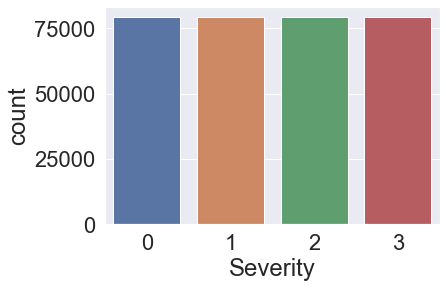

In [177]:
# checking for class imbalance

import seaborn as sns
sns.countplot(data_four['Severity'])

target_c = data_four.groupby('Severity').size()
target_c

In [178]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = data_four.values
X = array[:, 0:23]
Y = array[:, 23]

# feature extraction
model = LogisticRegression(solver= 'lbfgs', max_iter= 5000)
rfe = RFE(model, 18)
fit = rfe.fit(X, Y)

# print("Num Features: {}".format(fit.n_features_)) 
# print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

C:\Users\Shehu\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Feature Ranking: [6 5 4 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [179]:
cols = ['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
        'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
        'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
        'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
        'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes',
        'Country']

ranking = list(fit.ranking_)
feature_lt = []

for col, ran in zip(cols, ranking):
    if ran == 1:
        feature_lt.append(col)

print(feature_lt)

['None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male', 'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes', 'Country']


In [185]:
dataframe = data.loc[:, ['None_Sympton', 'Pains', 'Diarrhea', 
                         'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male', 
                         'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes', 'Country', 'Severity']]

<AxesSubplot:>

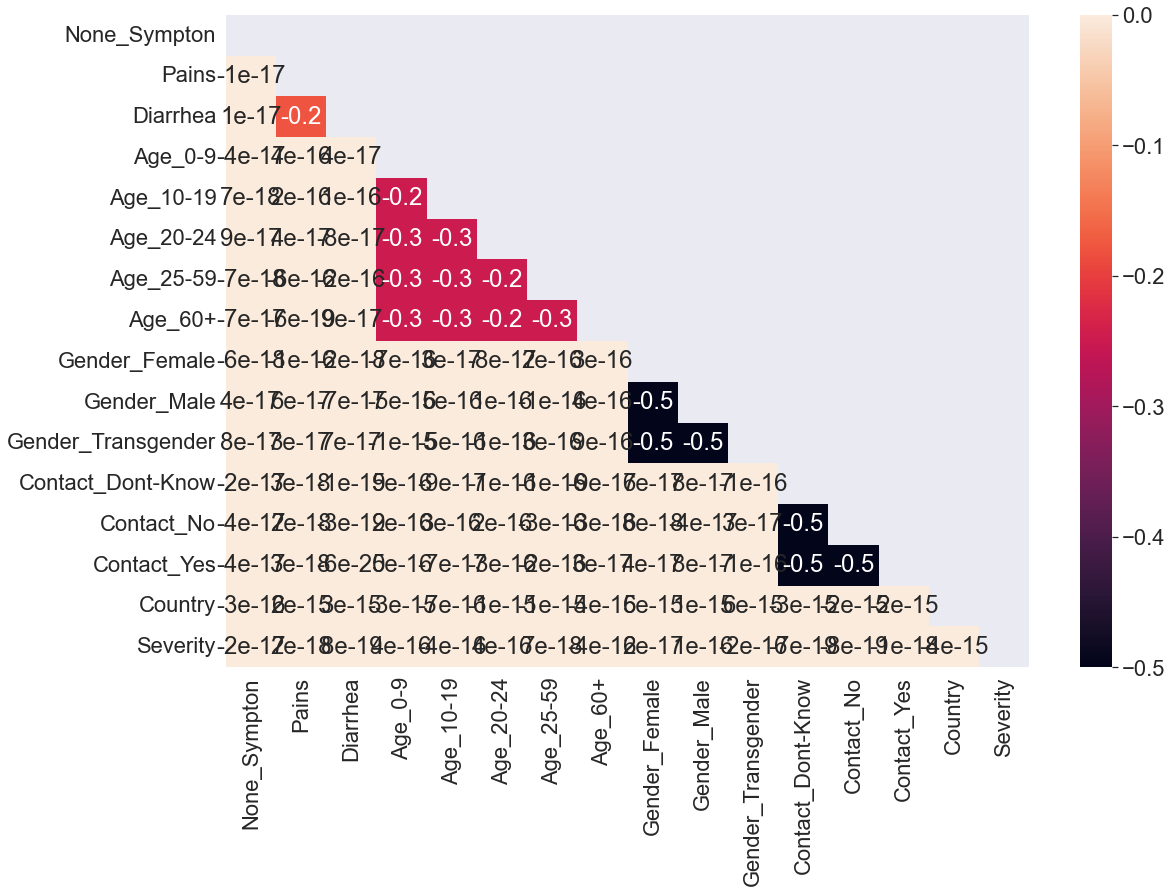

In [186]:
import numpy as np
import seaborn as sns

matrix = np.triu(dataframe.corr())
plt.figure(figsize = (18, 12))
sns.heatmap(dataframe.corr(), annot = True, mask = matrix, fmt='.1g')

In [190]:
# Evaluate using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

array = dataframe.values
x = array[:, 0:15]
y = array[:, 15]

test_size = 0.20
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

model = LogisticRegression()
model.fit(x_train, y_train)
result = model.score(x_test, y_test)

print("Accuracy: {}".format(result * 100.0))

Accuracy: 24.367108585858585


In [188]:
# Using Decision Trees for classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

array = dataframe.values
x = array[:, 0:15]
y = array[:, 15]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

d_tree = DecisionTreeClassifier(random_state=10)
d_tree = d_tree.fit(X_train, y_train)

y_pred = d_tree.predict(X_test)

# print(y_test)
# print(y_pred)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Severity'], colnames=['Severity'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

Accuracy: 0.4116161616161616 


----------Confusion Matrix------------------------------------
Severity             0      1     2    3
Actual Severity                         
0                  218  14830  3739  956
1                14998     75  3739  956
2                15097   3823    25  956
3                15090   3766   924    8


In [191]:
# Using Random Forest for classification

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

array = dataframe.values
x = array[:, 0:15]
y = array[:, 15]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

cm = pd.crosstab(y_test, y_pred, rownames=['Actual Severity'], colnames=['Severity'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

Accuracy: 0.452020202020202 


----------Confusion Matrix------------------------------------
Severity            0     1     2     3
Actual Severity                        
0                  84  6580  6616  6543
1                6616    97  6500  6592
2                6537  6582    94  6603
3                6703  6490  6480    83


In [ ]:
# second method

In [192]:
# Feature Engineer and create a new feature name severity_outcome

def severity_rate(x):
    if x == 0 or x == 1:
        return 0
    else:
        return 1

data_two['Severity_Outcome'] = data_two['Severity'].apply(severity_rate)
df = data_two[['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
              'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
              'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
              'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
              'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes',
              'Country', 'Severity','Severity_Outcome']]

In [193]:
df.head(10)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Severity,Severity_Outcome
0,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,1,0,0,0
1,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,1,0,0,0,0
2,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,1,0,0,0,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,1,0,1,0
4,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,1,0,0,1,0
5,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,1,0,0,0,1,0
6,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,1,0,3,1
7,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,1,0,0,3,1
8,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,1,0,0,0,3,1
9,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,1,0,2,1


C:\Users\Shehu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Severity_Outcome
0    158400
1    158400
dtype: int64

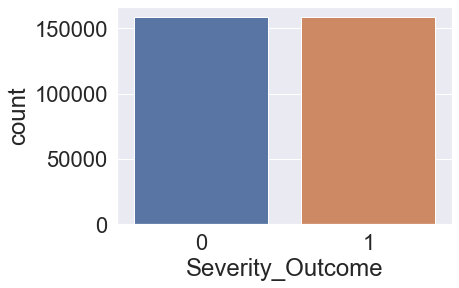

In [194]:
# checking for class imbalance

import seaborn as sns
sns.countplot(df['Severity_Outcome'])

target_c = df.groupby('Severity_Outcome').size()
target_c

In [ ]:
severity None and Mild = 0
severity Moderate and severe = 1

In [195]:
# dropping the column severity to avoid duplicate

columns = ['Severity']
df.drop(columns, inplace = True, axis=1)

In [196]:
df.tail(20)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Severity_Outcome
316780,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,5,0
316781,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,1,0,0,5,0
316782,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,5,1
316783,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,5,1
316784,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,1,0,0,5,1
316785,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,5,1
316786,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,5,1
316787,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,1,0,0,5,1
316788,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,5,0
316789,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,5,0


In [197]:
df.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes',
       'Country', 'Severity_Outcome'],
      dtype='object')

In [198]:
df.shape

(316800, 24)

In [199]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = df.values
X = array[:, 0:23]
Y = array[:, 23]

# feature extraction
model = LogisticRegression(solver= 'lbfgs', max_iter= 5000)
rfe = RFE(model, 18)
fit = rfe.fit(X, Y)

# print("Num Features: {}".format(fit.n_features_)) 
# print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

C:\Users\Shehu\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Feature Ranking: [6 5 4 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [200]:
cols = ['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
        'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
        'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
        'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
        'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes',
        'Country']

ranking = list(fit.ranking_)
feature_lt = []

for col, ran in zip(cols, ranking):
    if ran == 1:
        feature_lt.append(col)

print(feature_lt)

['None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male', 'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes', 'Country']


In [205]:
dataframe1 = data.loc[:, ['None_Sympton', 'Pains', 'Diarrhea','Age_0-9','Age_10-19',
                         'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male','Gender_Transgender',
                         'Contact_Dont-Know', 'Contact_No', 'Contact_Yes', 'Country','Severity_Outcome']]

<AxesSubplot:>

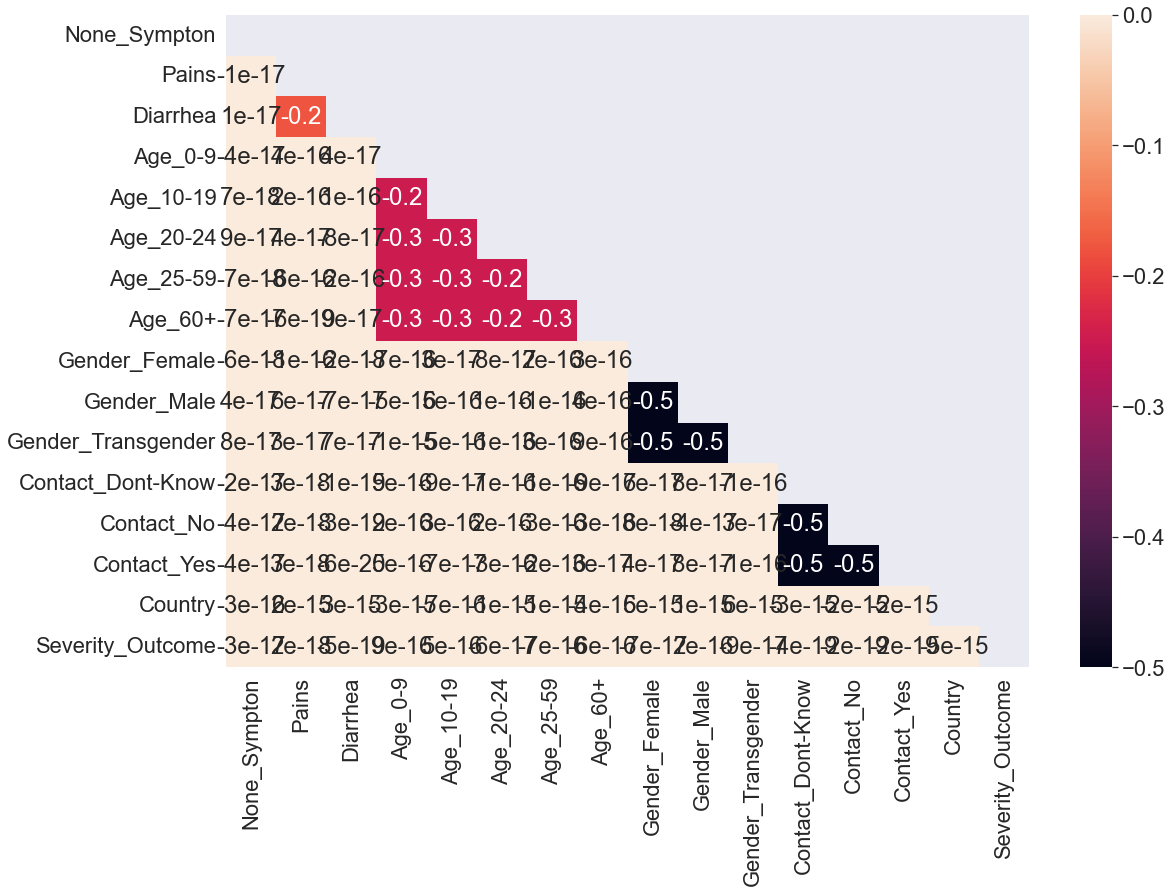

In [206]:
import numpy as np
import seaborn as sns

matrix = np.triu(dataframe1.corr())
plt.figure(figsize = (18, 12))
sns.heatmap(dataframe1.corr(), annot = True, mask = matrix, fmt='.1g')

In [207]:
# Evaluate using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

array = dataframe1.values
x = array[:, 0:15]
y = array[:, 15]

test_size = 0.20
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

model = LogisticRegression()
model.fit(x_train, y_train)
result = model.score(x_test, y_test)

print("Accuracy: {}".format(result * 100.0))

Accuracy: 49.64962121212121


In [210]:
# LogissticRegression Classification
    
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

array = dataframe1.values
x = array[:, 0:15]
y = array[:, 15]

num_folds = 10
test_size = 0.33
seed = 7

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state= seed)

kfold = KFold(n_splits= num_folds)
model = LogisticRegression(max_iter= 500)

results = cross_val_score(model, x, y, cv= kfold)
score = np.mean(results)

y_pred = cross_val_predict(model, x, y, cv= 3)
con_m = confusion_matrix(y, y_pred)

my_model = model.fit(x_train, y_train)
predicted = my_model.predict(x_test)
report = classification_report(y_test, predicted)

print(results)
print()
print('The mean score is', score * 100)
print()
print(con_m)


[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]

The mean score is 50.0

[[158400      0]
 [158400      0]]


In [214]:
# Gaussian Naive Bayes Classification

from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

array = dataframe1.values
x = array[:, 0:15]
y = array[:, 15]

num_folds = 10
test_size = 0.33
seed = 7

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state= seed)

kfold = KFold(n_splits= num_folds)
model = GaussianNB()

results = cross_val_score(model, x, y, cv= kfold)
score = np.mean(results)

y_pred = cross_val_predict(model, x, y, cv= 3)
con_m = confusion_matrix(y, y_pred)

my_model = model.fit(x_train, y_train)
predicted = my_model.predict(x_test)
report = classification_report(y_test, predicted)

print('Accuracy:', results.mean() * 100.0)
print()
print('The mean score is', score * 100)
print()
print(con_m)


Accuracy: 50.0

The mean score is 50.0

[[158400      0]
 [158400      0]]


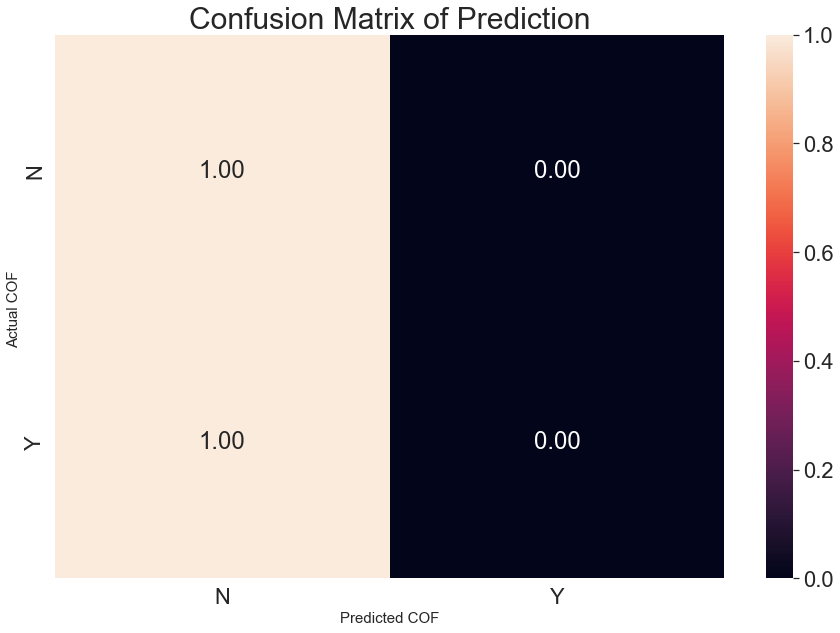

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = con_m
labls = ['N', 'Y']
sns.set(font_scale= 2)
cmn = cm.astype('float') / cm.sum(axis= 1)[:, np.newaxis]
fig, ax = plt.subplots(figsize= (15, 10))
sns.heatmap(cmn, annot= True, fmt='.2f', xticklabels= labls, yticklabels=labls)
plt.ylabel('Actual COF ', size= 15)
plt.xlabel('Predicted COF', size= 15)
plt.title('Confusion Matrix of Prediction', size= 30)

# plt.figure(figsize= (16, 8))
plt.show(block=False)

In [ ]:
# third method 

In [162]:
# Feature Engineer and create a new feature name severity_outcome

def severity_rate(x):
    if x > 0 or x == 1:
        return 0
    else:
        return 1

data_three['Severity_Outcome'] = data_three['Severity'].apply(severity_rate)
dframe = data_three[['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
              'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
              'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
              'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
              'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes',
              'Country', 'Severity','Severity_Outcome']]

In [163]:
dframe.head(20)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Severity,Severity_Outcome
0,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,1,0,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,1,0,0,0,1
2,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,1,0,0,0,0,1
3,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,1,0,1,0
4,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,1,0,0,1,0
5,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,1,0,0,0,1,0
6,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,1,0,3,0
7,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,1,0,0,3,0
8,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,1,0,0,0,3,0
9,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,1,0,2,0


C:\Users\Shehu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Severity_Outcome
0    237600
1     79200
dtype: int64

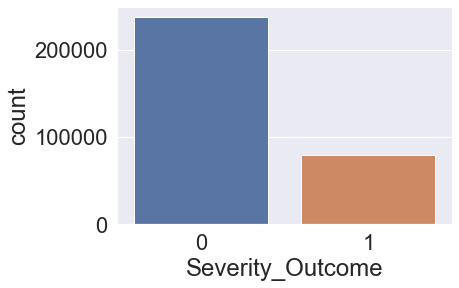

In [164]:
# checking for class imbalance

import seaborn as sns
sns.countplot(dframe['Severity_Outcome'])

target_c = dframe.groupby('Severity_Outcome').size()
target_c

In [165]:
# dropping the column severity to avoid duplicate

columns = ['Severity']
dframe.drop(columns, inplace = True, axis=1)

In [173]:
dframe.shape

(316800, 18)

In [168]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = dframe.values
X = array[:, 0:23]
Y = array[:, 23]

# feature extraction
model = LogisticRegression(solver= 'lbfgs', max_iter= 5000)
rfe = RFE(model, 18)
fit = rfe.fit(X, Y)

# print("Num Features: {}".format(fit.n_features_)) 
# print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

C:\Users\Shehu\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Feature Ranking: [1 2 1 1 1 1 1 4 3 1 5 1 1 1 1 1 1 1 1 1 1 1 6]


In [169]:
cols = ['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
        'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
        'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
        'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
        'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes',
        'Country']

ranking = list(fit.ranking_)
feature_lt = []

for col, ran in zip(cols, ranking):
    if ran == 1:
        feature_lt.append(col)

print(feature_lt)

['Fever', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'None_Sympton', 'Pains', 'Diarrhea', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male', 'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes']


In [174]:
dframe = data.loc[:, ['Fever', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'None_Sympton', 'Pains', 'Diarrhea',
                      'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
                      'Gender_Transgender', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes', 'Severity_Outcome']]

In [175]:
# Evaluate using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

array = dframe.values
x = array[:, 0:18]
y = array[:, 18]

test_size = 0.20
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

model = LogisticRegression()
model.fit(x_train, y_train)
result = model.score(x_test, y_test)

print("Accuracy: {}".format(result * 100.0))

Accuracy: 75.28251262626262


In [211]:
# Using Decision Trees for classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

array = dframe.values
x = array[:, 0:18]
y = array[:, 18]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

d_tree = DecisionTreeClassifier(random_state=10)
d_tree = d_tree.fit(X_train, y_train)

y_pred = d_tree.predict(X_test)

# print(y_test)
# print(y_pred)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Severity'], colnames=['Severity'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

Accuracy: 71.66540404040404 


----------Confusion Matrix------------------------------------
Severity             0     1
Actual Severity             
0                56748  2709
1                19732    11


In [213]:
# Gaussian Naive Bayes Classification

from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

array = dframe.values
x = array[:, 0:18]
y = array[:, 18]

num_folds = 10
test_size = 0.33
seed = 7

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state= seed)

kfold = KFold(n_splits= num_folds)
model = GaussianNB()

results = cross_val_score(model, x, y, cv= kfold)
score = np.mean(results)

y_pred = cross_val_predict(model, x, y, cv= 3)
con_m = confusion_matrix(y, y_pred)

my_model = model.fit(x_train, y_train)
predicted = my_model.predict(x_test)
report = classification_report(y_test, predicted)

print('Accuracy:', results.mean() * 100.0)
print()
print('The mean score is', score * 100)
print()
print(con_m)


C:\Users\Shehu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shehu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 75.0

The mean score is 75.0

[[237600      0]
 [ 79200      0]]


C:\Users\Shehu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
